### Predicting Daily Temperature Maximum

In [2]:
import pandas as pd

# Imports and dataset
# Load the dataset
df = pd.read_csv('POWER_Point_Hourly_20221101_20241119_040d78N_073d97W_LST.csv')
print(df.head())

   YEAR  MO  DY  HR    T2M  PRECTOTCORR  QV2M      PS  WS2M    WD2M  ...  \
0  2022  11   1   0  14.26         0.28  9.89  100.67  1.20  199.73  ...   
1  2022  11   1   1  14.26         0.24  9.95  100.69  1.11  204.58  ...   
2  2022  11   1   2  14.19         0.30  9.89  100.70  1.01  212.71  ...   
3  2022  11   1   3  14.17         0.33  9.89  100.69  0.99  215.07  ...   
4  2022  11   1   4  14.07         0.26  9.83  100.69  1.01  213.32  ...   

    WD10M   RH2M  T2MWET  T2MDEW  ALLSKY_SFC_UV_INDEX  ALLSKY_SFC_SW_DWN  \
0  196.72  98.00   14.11   13.97                  0.0                0.0   
1  201.80  98.19   14.13   14.01                  0.0                0.0   
2  212.21  98.50   14.08   13.97                  0.0                0.0   
3  215.08  98.31   14.05   13.93                  0.0                0.0   
4  211.55  98.38   13.95   13.83                  0.0                0.0   

   CLRSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DNI  ALLSKY_SFC_SW_DIFF  TOA_SW_DWN  
0           

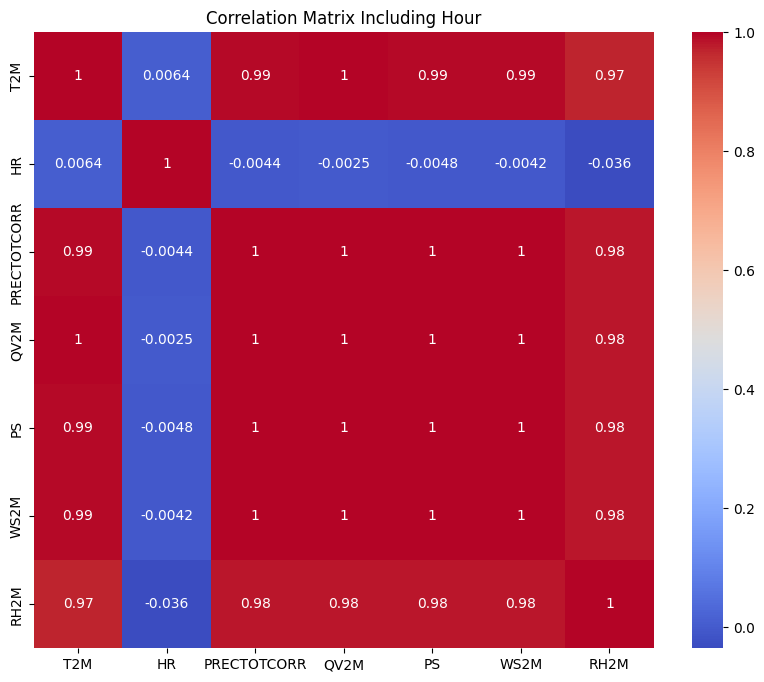

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing correlations between some variables including hour
plt.figure(figsize=(10, 8))
correlation_matrix = df[['T2M', 'HR', 'PRECTOTCORR', 'QV2M', 'PS', 'WS2M', 'RH2M']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Including Hour')
plt.show()


These features all look correlated.

In [4]:
# Find rows that contain 999 or -999
rows_with_invalid_values = df[(df == 999).any(axis=1) | (df == -999).any(axis=1)]
num_rows_with_invalid_values = rows_with_invalid_values.shape[0]

print(f"Number of rows that contain 999 or -999: {num_rows_with_invalid_values}")

Number of rows that contain 999 or -999: 3417


In [7]:
# Remove last 6 columns of the dataset
df_cleaned = df.drop(columns=['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DIFF', 'TOA_SW_DWN'])


In [8]:
df_cleaned.head()

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,QV2M,PS,WS2M,WD2M,WS10M,WD10M,RH2M,T2MWET,T2MDEW
0,2022,11,1,0,14.26,0.28,9.89,100.67,1.20,199.73,2.55,196.72,98.00,14.11,13.97
1,2022,11,1,1,14.26,0.24,9.95,100.69,1.11,204.58,2.44,201.80,98.19,14.13,14.01
2,2022,11,1,2,14.19,0.30,9.89,100.70,1.01,212.71,2.27,212.21,98.50,14.08,13.97
3,2022,11,1,3,14.17,0.33,9.89,100.69,0.99,215.07,2.15,215.08,98.31,14.05,13.93
4,2022,11,1,4,14.07,0.26,9.83,100.69,1.01,213.32,2.09,211.55,98.38,13.95,13.83


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned[['HR', 'PRECTOTCORR', 'QV2M', 'PS', 'WS2M', 'WD2M', 'WS10M', 'WD10M', 'RH2M']]
y = df_cleaned['T2M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=True)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R²: {r2}")

RMSE: 0.03103798224999992, R²: 0.9999948421540708


C:\Users\Andrew\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

       Feature    Importance
1  PRECTOTCORR  1.777969e-01
7        WD10M  1.482357e-01
2         QV2M  1.389277e-01
5         WD2M  1.185014e-01
8         RH2M  1.103094e-01
3           PS  1.086929e-01
4         WS2M  9.881132e-02
6        WS10M  9.872378e-02
0           HR  8.637748e-07


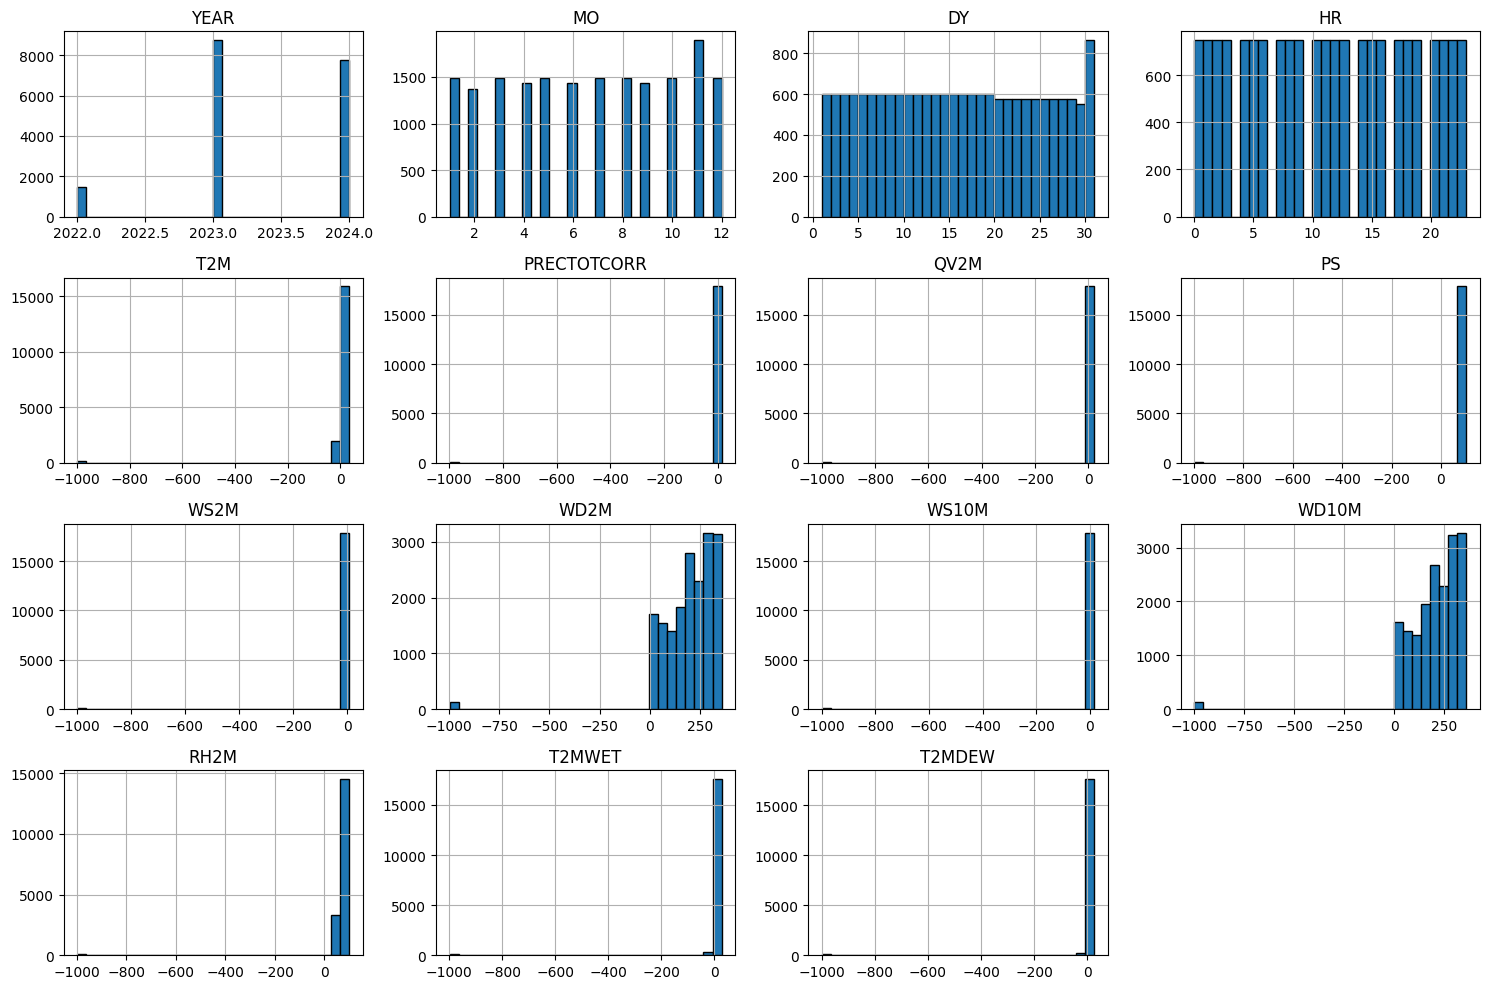

In [14]:
df_cleaned.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()